### Problem Statement: -
With the emergence of giant e-commerce firms such as Amazon or retail corporations such as COSTCO and Walmart, it is extremely crucial for new growing or small businesses to use various marketing methods to promote their business. Marketing campaigns cannot always be tailored to each individual client, but they do have the flexibility to send many adverts combined with imagery to a diverse range of individuals. Family members may be drawn to several types of advertisements, whereas single working professionals may be drawn to commercials that interest them. The issue for marketing teams arises here; they may know who they are attempting to reach, but they want to know what handful of advertising they should create to appeal to a broad range of individuals without splintering their campaign into thousands of tailored ads, which may be prohibitively expensive.

<!-- ### Features Information from Kaggle:
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Tennhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
MntWines: Amount spent on wine in the last 2 years
MntFruits: Amount spent on fruits in the last 2 years
MntMeatProducts: Amount spent on meat in the last 2 years
MntFishProducts: Amount spent on fish in the last 2 years
MntSweetProducts: Amount spent on sweets in the last 2 years
MntGoldProds: Amount spent on gold in the last 2 years
NumDealsPurchase: Number of purchases made with a discount
NumWebPurchase: Number of purchases made through the company's web site
NumCatalogPurchase: Number of purchases made using a catalogue
NumStorePurchase: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company's web site in the last month
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Country: Customer's location -->

### Features Information from Kaggle:
#### ID: Customer's unique identifier
#### Year_Birth: Customer's birth year
#### Education: Customer's education level
#### Marital_Status: Customer's marital status
#### Income: Customer's yearly household income
#### Kidhome: Number of children in customer's household
#### Tennhome: Number of teenagers in customer's household
#### Dt_Customer: Date of customer's enrollment with the company
#### Recency: Number of days since customer's last purchase
#### MntWines: Amount spent on wine in the last 2 years
#### MntFruits: Amount spent on fruits in the last 2 years
#### MntMeatProducts: Amount spent on meat in the last 2 years
#### MntFishProducts: Amount spent on fish in the last 2 years
#### MntSweetProducts: Amount spent on sweets in the last 2 years
#### MntGoldProds: Amount spent on gold in the last 2 years
#### NumDealsPurchase: Number of purchases made with a discount
#### NumWebPurchase: Number of purchases made through the company's web site
#### NumCatalogPurchase: Number of purchases made using a catalogue
####  NumStorePurchase: Number of purchases made directly in stores
#### NumWebVisitsMonth: Number of visits to company's web site in the last month
#### AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#### AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#### AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#### AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#### AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
#### Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Complain: 1 if customer complained in the last 2 years, 0 otherwise
#### Country: Customer's location 

### Importing python liabraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import datetime as dt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Creating frequently used functions during the EDA process

In [2]:
def chart_png(plt,file):
    filename = '../../Output_Charts/EDA/'+file+'.png'
    plt.savefig(filename, dpi=300)

### Creating a function to generate basic information of the data

In [56]:
def data_info(data):
    print("Dataset has",data.shape[1], "colummns and ",data.shape[0],"rows")
    print("\n")
    print("Data has",data[data.duplicated()].shape[0], "duplicate rows")
    print("\n")
    print("Dataset missing values:\n",data.isnull().sum()[data.isnull().sum()>0] )
    print("\n")
    print("Dataset attribute's datatypes:\n", data.dtypes)
    print("\n")
    print("Dataset Info:\n", data.info())
    print("\n")
    print("Dataset Describe:\n", data.describe)
    print("\n")
    display(data)

### loading the csv file for analysis

In [57]:
market_data = pd.read_csv("../../Input_Data/EDA/marketing_data.csv")
data_info(market_data)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
  Income     24
dtype: int64


Dataset attribute's datatypes:
 ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtyp

'Dataset Describe:\n'

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  N

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


### From the basic information that we got from the function, below are the few assessments
#### 1. Dataset has 2237 rows and 28 columns
#### 2. Dateset does not contain any duplicates
#### 3. Income attributes are string type rather they have to be integer columns
#### 4. Year_Birth column has Birth Year, we should convert it to Age
#### 5. Marital status is currently having some values which can be converted to ordinal values
#### 6. Education is currently having some values which can be converted to ordinal values too

#### Lets look in to the income column 

In [5]:
market_data[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

In [6]:
market_data[market_data[' Income '].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


### Quality Issues with Income column
#### There is a space in front and end of the income's column name
#### There are dollar signs in  the values of Income column
#### The "Income" column has 24 missing values
#### Income's type is string

### Data Cleaning

In [7]:
market_data_copy= market_data
data_info(market_data_copy)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
  Income     24
dtype: int64


Dataset attribute's datatypes:
 ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtyp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### Renaming the Income column as it has spaces

In [8]:
market_data_copy.rename(columns={' Income ':'Income'},inplace=True)
market_data_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#### Removing $,.,00 signs form Income columns data

In [9]:
market_data['Income'] = market_data['Income'].str.strip('$')
market_data['Income'] = market_data['Income'].str.replace(',','')
data_info(market_data)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
 Income    24
dtype: int64


Dataset attribute's datatypes:
 ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype:

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.00,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.00,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.00,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.00,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


### Converting Income column to integer column
#### Dividing the dataframe to 2 with one have all Income values and other with missing income values

In [10]:
market_data_Income = market_data[market_data.Income.isnull()==False]
data_info(market_data_Income) #checking if the new  dataframe does not have any missing values

Dataset has 28 colummns and  2216 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.00,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.00,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.00,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.00,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.00,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.00,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [11]:
incomeType = market_data_Income.Income.astype(float)
market_data_Income.Income = incomeType
market_data_Missing_Income = market_data[market_data.Income.isnull()==True]
data_info(market_data_Missing_Income)
# there are 24 rows with income column missing
# this data frame has only the missing values 

Dataset has 28 colummns and  24 rows


Data has 0 duplicate rows


Dataset missing values:
 Income    24
dtype: int64


Dataset attribute's datatypes:
 ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: o

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\3015499223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_Income.Income = incomeType


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


### Checking the skewness of the Income attribute

In [12]:
market_data_Income['Income'].skew()

6.763487372811114

Mean:  52247.25135379061 
Median:  51381.5 
Mode:  7500.0


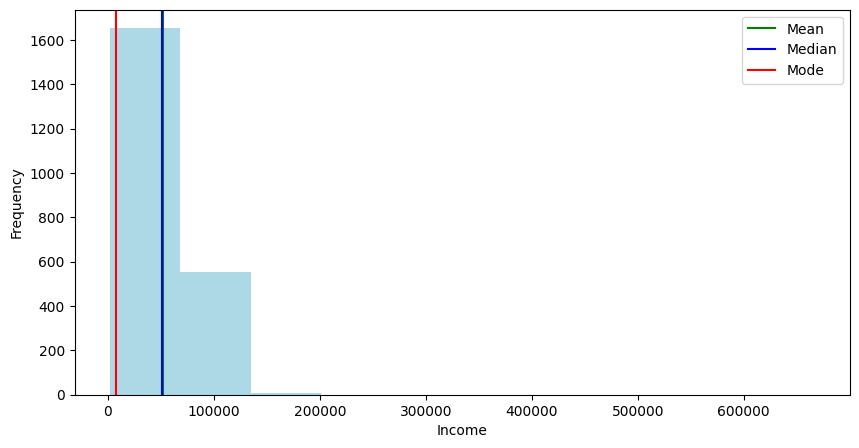

In [13]:
mean = market_data_Income['Income'].mean()
median = market_data_Income['Income'].median()
mode = market_data_Income['Income'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(market_data_Income['Income'],bins=10,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')

plt.xlabel('Income')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()             # Plot the legend
chart_png(plt,"mean median mode of Income")
plt.show()

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\4067239690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data_Income['Income'])


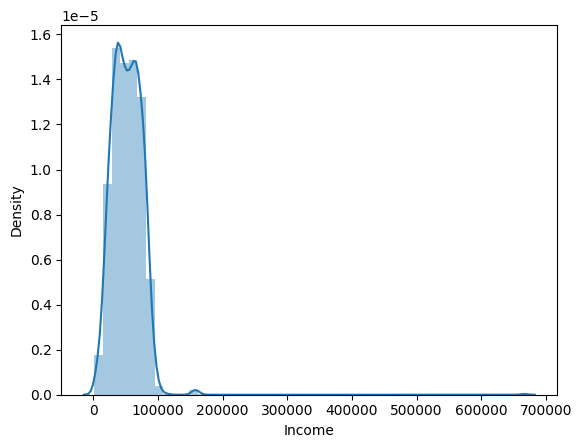

In [14]:
sns.distplot(market_data_Income['Income'])
chart_png(plt,"Distplot of Income")
plt.show()

#### From the distribution plot and histogram its clear that the Income attribute is right skewed  and here mean and median are almost equal so we can impute the missing values with the median from the income attribute column

#### Using Simple Imputer to impute the missing values with median of Income column

In [15]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(market_data_Income[['Income']])
incomeimputer=imputer.transform(market_data_Missing_Income[['Income']])
market_data_Missing_Income[['Income']]= incomeimputer
data_info(market_data_Missing_Income)

Dataset has 28 colummns and  24 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country     

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\4036534827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_Missing_Income[['Income']]= incomeimputer


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,51381.5,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,51381.5,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,51381.5,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,51381.5,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,51381.5,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,51381.5,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,51381.5,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,51381.5,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,51381.5,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,51381.5,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [16]:
income = market_data_Missing_Income['Income'].astype(float)
market_data_Missing_Income.Income = income
# Appending the Imputed income dataframe to the previous dataframe
market_data_Income = market_data_Income.append(market_data_Missing_Income)
data_info(market_data_Income)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country   

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\4017635165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data_Missing_Income.Income = income
C:\Users\41222\AppData\Local\Temp\ipykernel_20008\4017635165.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  market_data_Income = market_data_Income.append(market_data_Missing_Income)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,Master,Together,51381.5,0,0,11/23/13,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,1958,Graduation,Together,51381.5,1,1,9/3/12,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,1955,Graduation,Single,51381.5,0,1,10/18/13,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,1951,Graduation,Single,51381.5,2,1,1/1/14,96,48,...,4,6,0,0,0,0,0,0,0,AUS


#### There are no missing values in the dataset

#### Converting Education column to ordinal attribute which has ordinal values for each type of education taken
#### Education and their corrsponding Ordinal value: "Basic":1, "2n Cycle":2, "Graduation": 3, "Master": 4, "PHD":5

In [17]:
display(market_data_Income.Education.value_counts())
display(market_data_Income.Marital_Status.value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [18]:
educationMapper={"Basic":1,"2n Cycle":2,"Graduation":3,"Master":3,"PhD":4}
maritalstatusMapper={"Absurd":1,"Alone":1,"Divorced":2,"Married":4, "Single":1,"Together":4,"Widow":3,"YOLO":1}
market_data_Income.Education=market_data_Income.Education.replace(educationMapper)
market_data_Income.Marital_Status=market_data_Income.Marital_Status.replace(maritalstatusMapper)
data_info(market_data_Income)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                       int64
Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country   

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,3,2,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,3,1,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,3,4,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,3,4,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,3,1,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,3,4,51381.5,0,0,11/23/13,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,1958,3,4,51381.5,1,1,9/3/12,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,1955,3,1,51381.5,0,1,10/18/13,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,1951,3,1,51381.5,2,1,1/1/14,96,48,...,4,6,0,0,0,0,0,0,0,AUS


#### Converting the Dt_Customer column to date type from string

In [19]:
market_data_Income.Dt_Customer = pd.to_datetime(market_data_Income.Dt_Customer)
data_info(market_data_Income)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,3,2,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,3,1,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,3,4,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,3,4,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,3,1,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,3,4,51381.5,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,1958,3,4,51381.5,1,1,2012-09-03,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,1955,3,1,51381.5,0,1,2013-10-18,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,1951,3,1,51381.5,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,AUS


#### Store the data into csv 

In [20]:
market_data_Income.reset_index(drop=True)
market_data = market_data_Income
market_data.Dt_Customer = pd.to_datetime(market_data_Income.Dt_Customer)

### Exploratory data Analysis

In [21]:
data_info(market_data)

Dataset has 28 colummns and  2240 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,3,2,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,3,1,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,3,4,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,3,4,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,3,1,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,1973,3,4,51381.5,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,1958,3,4,51381.5,1,1,2012-09-03,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,1955,3,1,51381.5,0,1,2013-10-18,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,1951,3,1,51381.5,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,AUS


#### Outlier Detection using boxplots

Text(0.5, 0.9, 'Find Outliers')

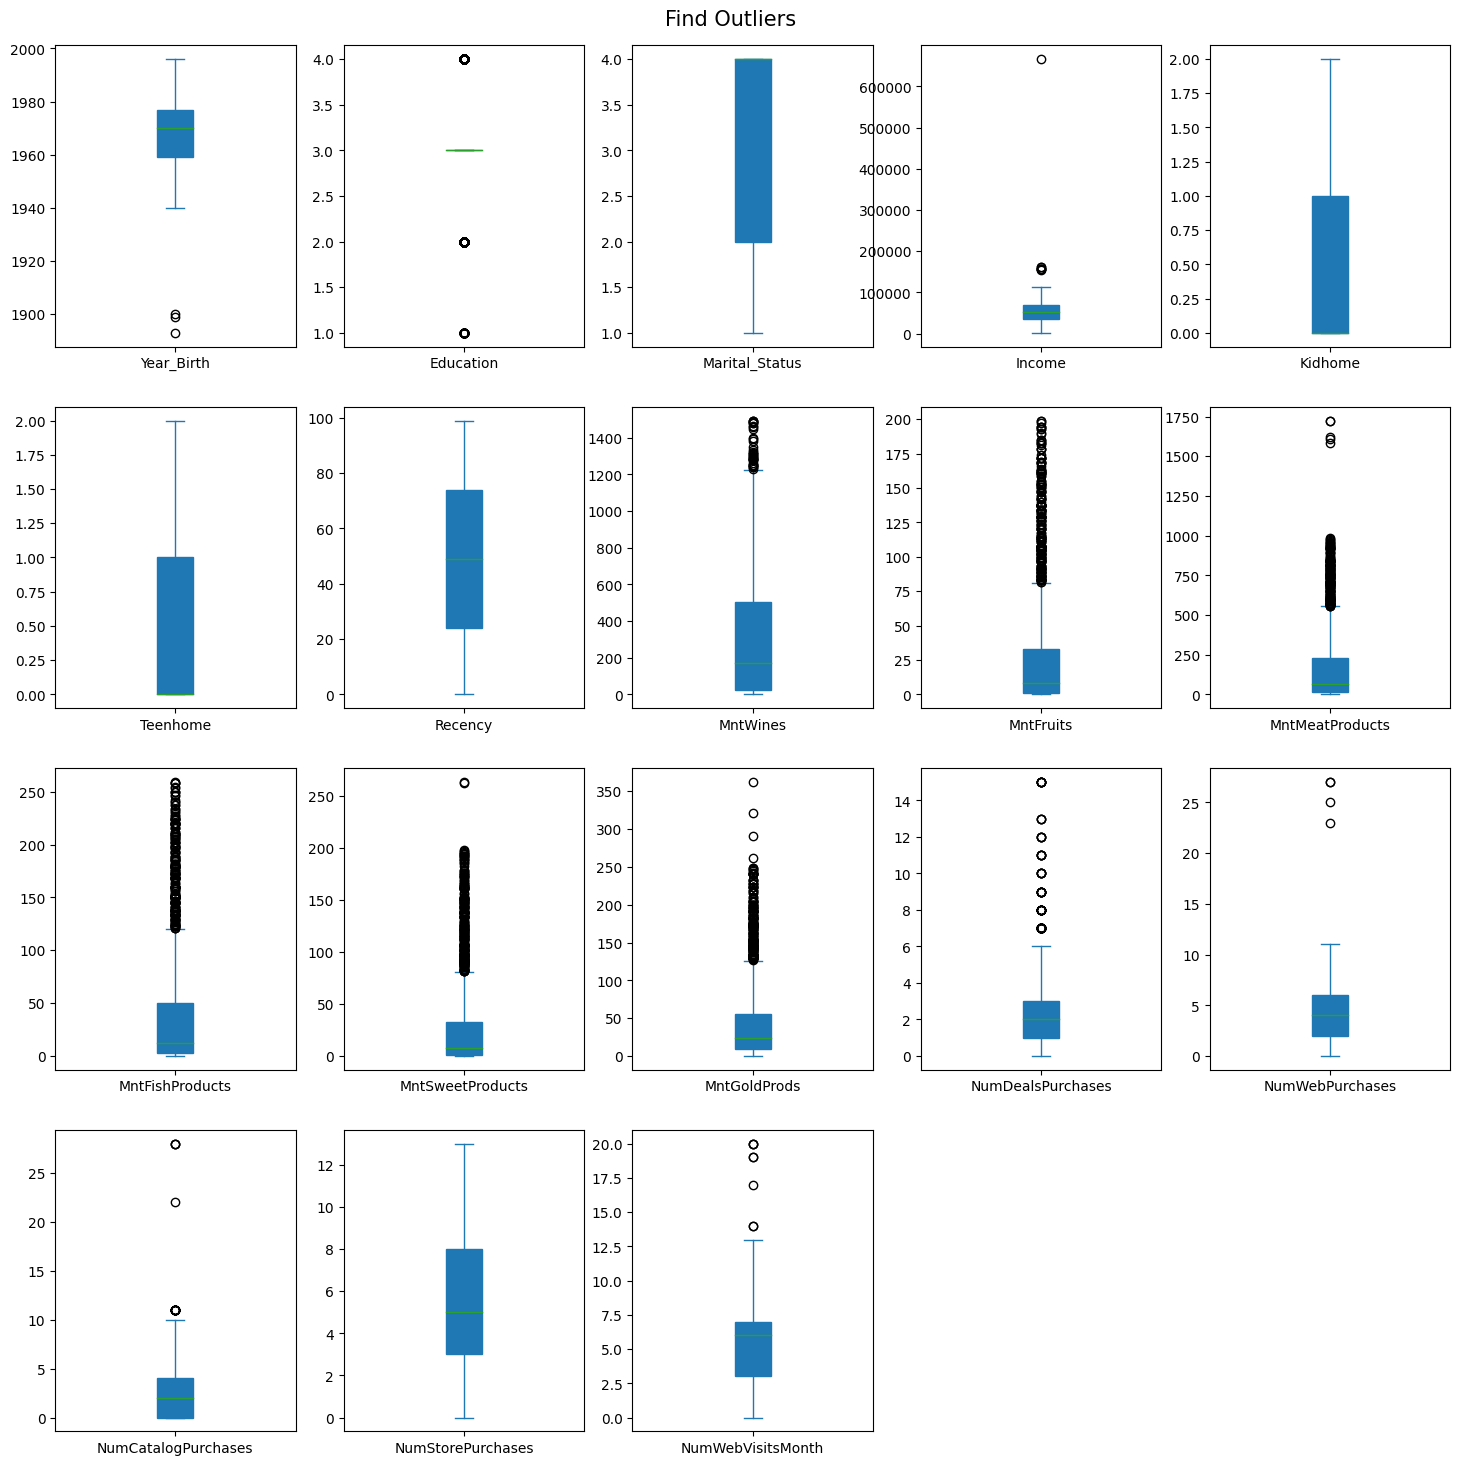

In [22]:
Attributes_to_plot = market_data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
Attributes_to_plot.plot(subplots=True, layout=(4,5), kind='box', figsize=(18,18), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)

In [23]:
def find_number_of_Outliers(col_name, data):
        q3=data.quantile(0.75)
        q1=data.quantile(0.25)
        IQR=q3-q1
        d=data[data>IQR+1.5*(IQR)].shape[0]
        print("Column :- ",col_name,"\n",d)

In [24]:
find_number_of_Outliers("Income", market_data.Income)
find_number_of_Outliers("Fruits", market_data.MntFruits)
find_number_of_Outliers("Sweet", market_data.MntSweetProducts)
find_number_of_Outliers("Meat", market_data.MntMeatProducts)
find_number_of_Outliers("Gold", market_data.MntGoldProds)
find_number_of_Outliers("Fish", market_data.MntFishProducts)
find_number_of_Outliers("DealsPurchases", market_data.NumDealsPurchases)
find_number_of_Outliers("WebPurchases", market_data.NumWebPurchases)
find_number_of_Outliers("CatalogPurchases", market_data.NumCatalogPurchases)
find_number_of_Outliers("WebVisitsMonth", market_data.NumWebVisitsMonth)

Column :-  Income 
 165
Column :-  Fruits 
 233
Column :-  Sweet 
 250
Column :-  Meat 
 189
Column :-  Gold 
 236
Column :-  Fish 
 235
Column :-  DealsPurchases 
 147
Column :-  WebPurchases 
 48
Column :-  CatalogPurchases 
 23
Column :-  WebVisitsMonth 
 9


#### From the boxplots and the descriptive statistics (IQR) we can see the number of values that are greater than IQR in all the columns which has outliers.
#### All the attributes except the Year_Birth seems to be natural outliers that came from population and can be ignored as these values has significance related to number of particular item purchases a customer has done and that is very important for us to predict the behaviour of the customer in the future.
#### Year_Birth column seems to be little different lets loot at the column alone and check 

In [25]:
market_data.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\3880163936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data.Year_Birth)


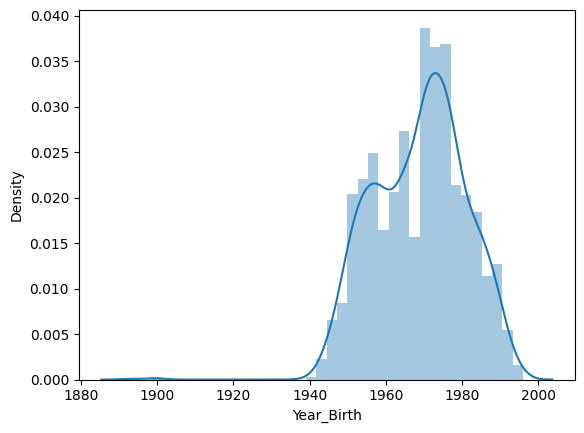

In [26]:
sns.distplot(market_data.Year_Birth)
plt.show()

In [27]:
market_data.Year_Birth.skew()

-0.34994385918269544

#### From the distribution plot, box plot and skewness computation its clear that the Year_Birth column is left skewed and Since its impossible that people who was born before 1900 is still alive. These are obviously data entry errors. We can remove these values from the dataset 
#### From normal distribution we know that 98% of the data lies between +- 0r - 3 standard deviations away from the mean. So, we remove the data that is less that 3 standard deviations

#### Checking how many values are less that 3 standard deviations away from the mean

In [28]:
market_data[market_data['Year_Birth']<=(market_data.Year_Birth.mean()-3*market_data.Year_Birth.std())].shape
market_data.shape

(2240, 28)

#### Removing the outliers

In [29]:
market_data = market_data[market_data.Year_Birth >= (market_data.Year_Birth.mean()-3*market_data.Year_Birth.std())]

In [30]:
market_data.shape

(2237, 28)

#### Now checking the distribution of the Year_Birth column

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\2673220256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data.Year_Birth)


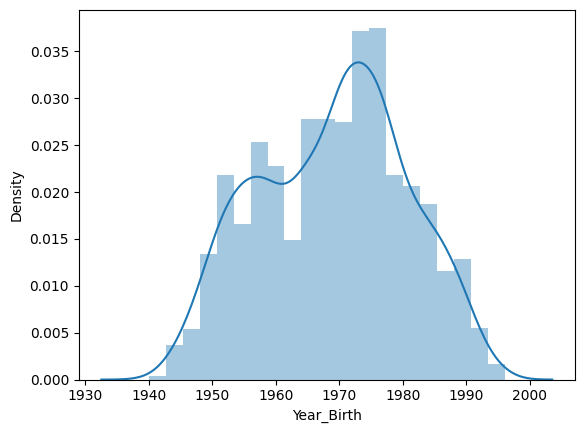

In [31]:
sns.distplot(market_data.Year_Birth)
plt.show()

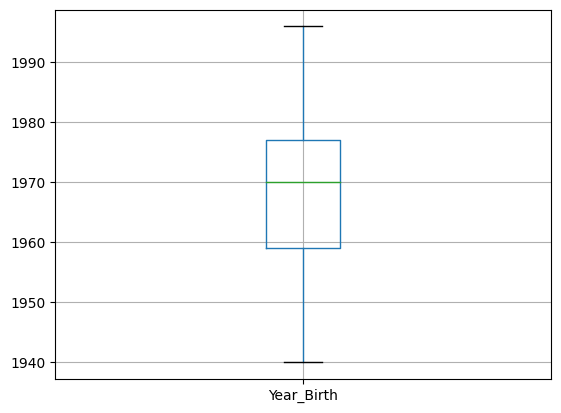

In [32]:
market_data.boxplot(column='Year_Birth') ### outliers are removed
plt.show()

#### Converting Birth Year to Age as per Age of Customer as of Dt_customer

In [33]:
market_data["Year_Birth"] = market_data.Dt_Customer.dt.year - market_data.Year_Birth
market_data.rename(columns={'Year_Birth':'Age'},inplace=True)

display(market_data)

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\2398225365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data["Year_Birth"] = market_data.Dt_Customer.dt.year - market_data.Year_Birth
C:\Users\41222\AppData\Local\Temp\ipykernel_20008\2398225365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data.rename(columns={'Year_Birth':'Age'},inplace=True)


,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,44,3,2,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,53,3,1,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,56,3,4,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,47,3,4,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,25,3,1,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,40,3,4,51381.5,0,0,2013-11-23,87,445,...,8,1,0,0,0,0,0,0,0,GER
1983,2902,54,3,4,51381.5,1,1,2012-09-03,87,19,...,3,5,0,0,0,0,0,0,0,AUS
2139,3117,58,3,1,51381.5,0,1,2013-10-18,95,264,...,5,7,0,0,0,0,0,0,0,AUS
2165,7244,63,3,1,51381.5,2,1,2014-01-01,96,48,...,4,6,0,0,0,0,0,0,0,AUS


#### Converting the DT_Customer date of customer joining the company to number of customer days in the company till now

In [34]:
market_data['Customer_duration_days'] = dt.datetime.now() - market_data['Dt_Customer']
market_data['Customer_duration_days'] = market_data['Customer_duration_days'].apply(lambda x: x.days)

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\370898291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Customer_duration_days'] = dt.datetime.now() - market_data['Dt_Customer']
C:\Users\41222\AppData\Local\Temp\ipykernel_20008\370898291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Customer_duration_days'] = market_data['Customer_duration_days'].apply(lambda x: x.days)


In [35]:
market_data=market_data.drop(labels='Dt_Customer',axis=1)

In [36]:
market_data.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Customer_duration_days'],
      dtype='object')

In [37]:
market_data.to_csv('../../Input_Data/Modelling/clean_Market_Data.csv', index=False)

### Correlation matrix

In [38]:
market_data_corr = pd.DataFrame(market_data.corr())
display(market_data_corr.describe)

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\687732505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  market_data_corr = pd.DataFrame(market_data.corr())


<bound method NDFrame.describe of                               ID       Age  Education  Marital_Status  \
ID                      1.000000 -0.003452   0.010360        0.025583   
Age                    -0.003452  1.000000   0.185930        0.065517   
Education               0.010360  0.185930   1.000000       -0.001614   
Marital_Status          0.025583  0.065517  -0.001614        1.000000   
Income                  0.013737  0.163129   0.175969        0.015925   
Kidhome                 0.002202 -0.230248  -0.062208        0.000889   
Teenhome               -0.003543  0.361684   0.143148        0.061191   
Recency                -0.046755  0.018119  -0.001333       -0.003840   
MntWines               -0.021181  0.153549   0.213652        0.007388   
MntFruits               0.007080  0.010509  -0.037442       -0.017803   
MntMeatProducts        -0.002622  0.026040   0.069507       -0.024322   
MntFishProducts        -0.023181  0.038459  -0.067338       -0.010374   
MntSweetProducts 

C:\Users\41222\AppData\Local\Temp\ipykernel_20008\514697697.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(data.corr(),vmin = -1, vmax = 1,center = 0, ax=ax, annot=True)


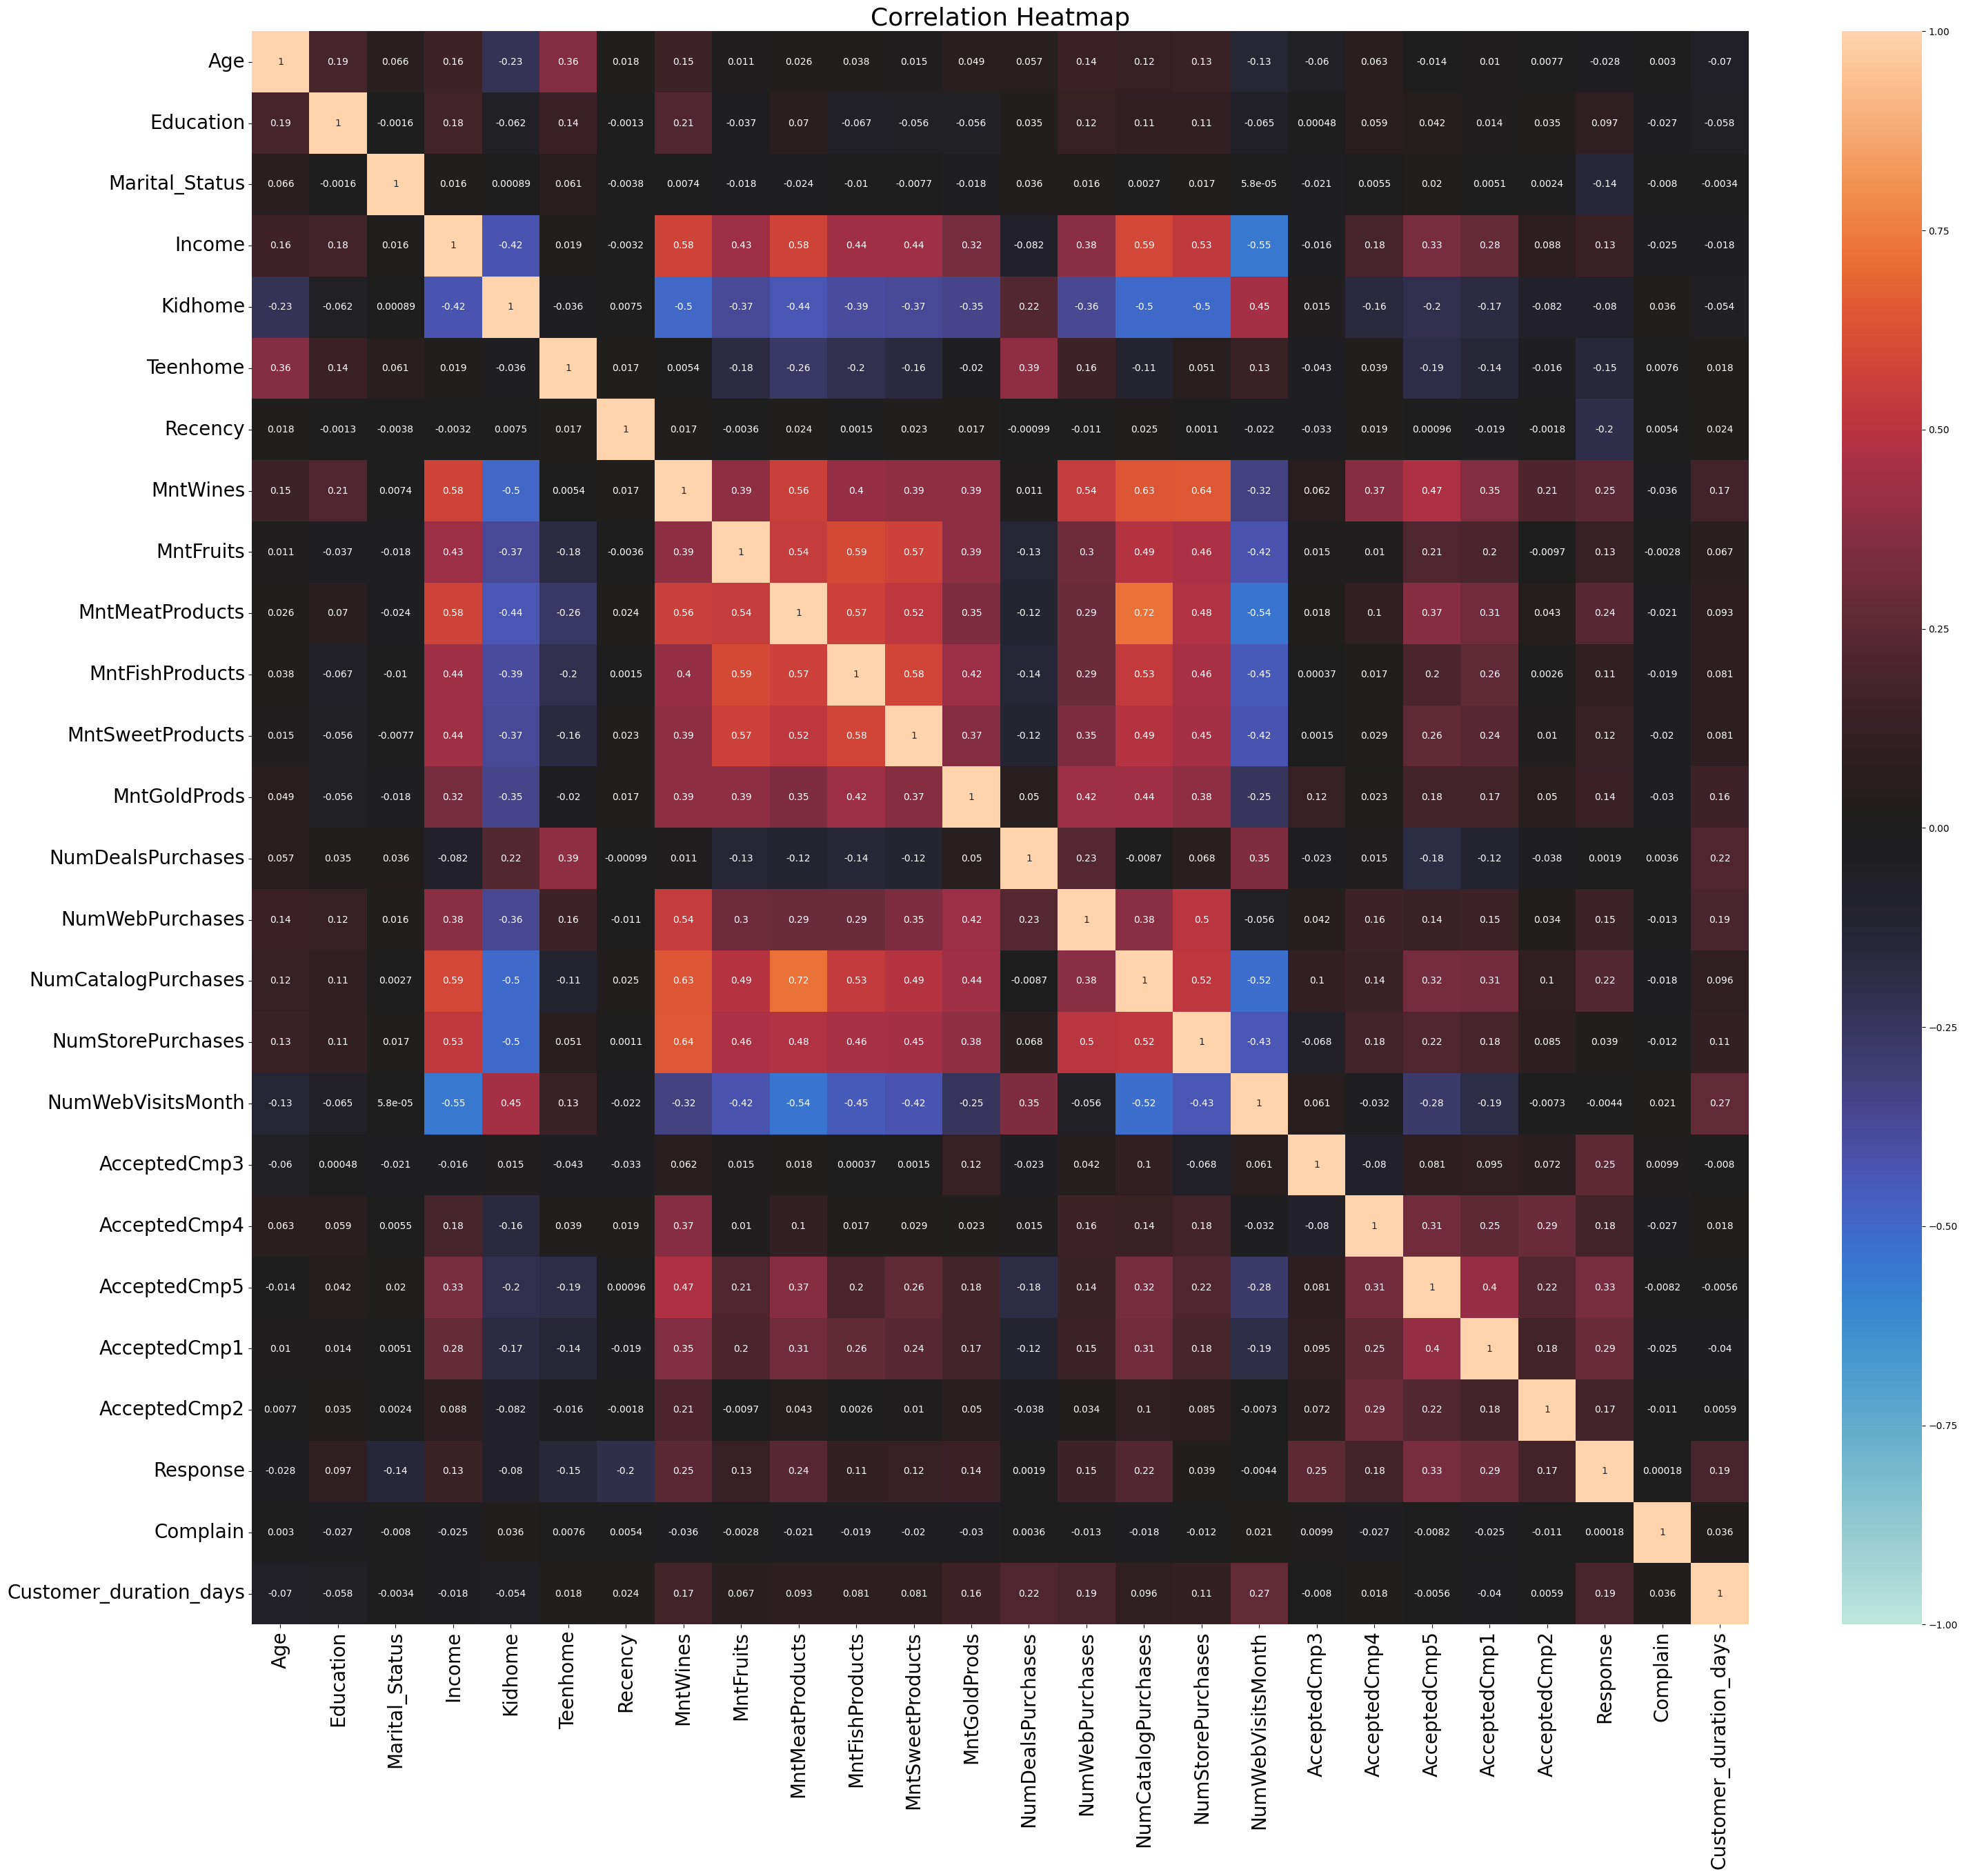

In [39]:
fig,ax = plt.subplots(figsize=(35, 30))  

data=market_data.drop(columns=['ID'])

heatmap=sns.heatmap(data.corr(),vmin = -1, vmax = 1,center = 0, ax=ax, annot=True)

heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontsize = 20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90, fontsize = 20)

plt.title("Correlation Heatmap", fontdict= {'fontsize': 26})
chart_png(plt,"Correlation Matrix-heatmap")
plt.show()

### We can Combine few features to create new features to avoid complexity

In [40]:
new_marketData = market_data.copy()

#### Combined Features


#### Children_home: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
#### Total_Amount: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
#### Total_Purchases : Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
#### Total_acceptance_campaign: Total number of times customer accepted the offer in marketing campaigns, which can be acquired by summing up all the "Accepted" campaingns columns
#### Avg_order_volume :  Average order volume of each customer, which can be acquired by dividing Total_Amount by Total_num_purchase

In [41]:
# Create new features
new_marketData["Children_home"] = new_marketData.Kidhome +new_marketData.Teenhome
new_marketData['Total_Amount'] = new_marketData.MntWines+ new_marketData.MntFruits+ new_marketData.MntMeatProducts+ new_marketData.MntFishProducts+ new_marketData.MntSweetProducts+ new_marketData.MntGoldProds 
new_marketData['Total_Purchases'] = new_marketData.NumDealsPurchases+ new_marketData.NumWebPurchases+ new_marketData.NumCatalogPurchases+ new_marketData.NumStorePurchases+ new_marketData.NumWebVisitsMonth 
new_marketData['Total_acceptance_Campaign'] =new_marketData.AcceptedCmp1 + new_marketData.AcceptedCmp2 + new_marketData.AcceptedCmp2 + new_marketData.AcceptedCmp2  +  new_marketData.AcceptedCmp3 +new_marketData.AcceptedCmp4 + new_marketData.AcceptedCmp5
new_marketData['Avg_order_volume'] = new_marketData.Total_Amount/new_marketData.Total_Purchases

In [42]:
#new_marketData.columns
data_info(new_marketData)

Dataset has 33 colummns and  2237 rows


Data has 0 duplicate rows


Dataset missing values:
 Series([], dtype: int64)


Dataset attribute's datatypes:
 ID                             int64
Age                            int64
Education                      int64
Marital_Status                 int64
Income                       float64
Kidhome                        int64
Teenhome                       int64
Recency                        int64
MntWines                       int64
MntFruits                      int64
MntMeatProducts                int64
MntFishProducts                int64
MntSweetProducts               int64
MntGoldProds                   int64
NumDealsPurchases              int64
NumWebPurchases                int64
NumCatalogPurchases            int64
NumStorePurchases              int64
NumWebVisitsMonth              int64
AcceptedCmp3                   int64
AcceptedCmp4                   int64
AcceptedCmp5                   int64
AcceptedCmp1                   in

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Customer_duration_days,Children_home,Total_Amount,Total_Purchases,Total_acceptance_Campaign,Avg_order_volume
0,1826,44,3,2,84835.0,0,0,0,189,104,...,0,1,0,SP,3089,0,1190,16,0,74.375000
1,1,53,3,1,57091.0,0,0,0,464,5,...,1,1,0,CA,3090,0,577,23,3,25.086957
2,10476,56,3,4,67267.0,0,1,0,134,11,...,0,0,0,US,3123,1,251,13,0,19.307692
3,1386,47,3,4,32474.0,1,1,0,10,0,...,0,0,0,AUS,3125,2,11,11,0,1.000000
4,5371,25,3,1,21474.0,1,0,0,6,16,...,0,1,0,SP,3158,1,91,15,1,6.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,5798,40,3,4,51381.5,0,0,87,445,37,...,0,0,0,GER,3294,0,985,16,0,61.562500
1983,2902,54,3,4,51381.5,1,1,87,19,4,...,0,0,0,AUS,3740,2,45,10,0,4.500000
2139,3117,58,3,1,51381.5,0,1,95,264,0,...,0,0,0,AUS,3330,1,450,22,0,20.454545
2165,7244,63,3,1,51381.5,2,1,96,48,5,...,0,0,0,AUS,3255,3,124,16,0,7.750000


C:\Users\41222\AppData\Local\Temp\ipykernel_20008\981348685.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn=sns.heatmap(data.corr(),vmin = -1, vmax = 1,center = 0, ax=ax, annot=True)


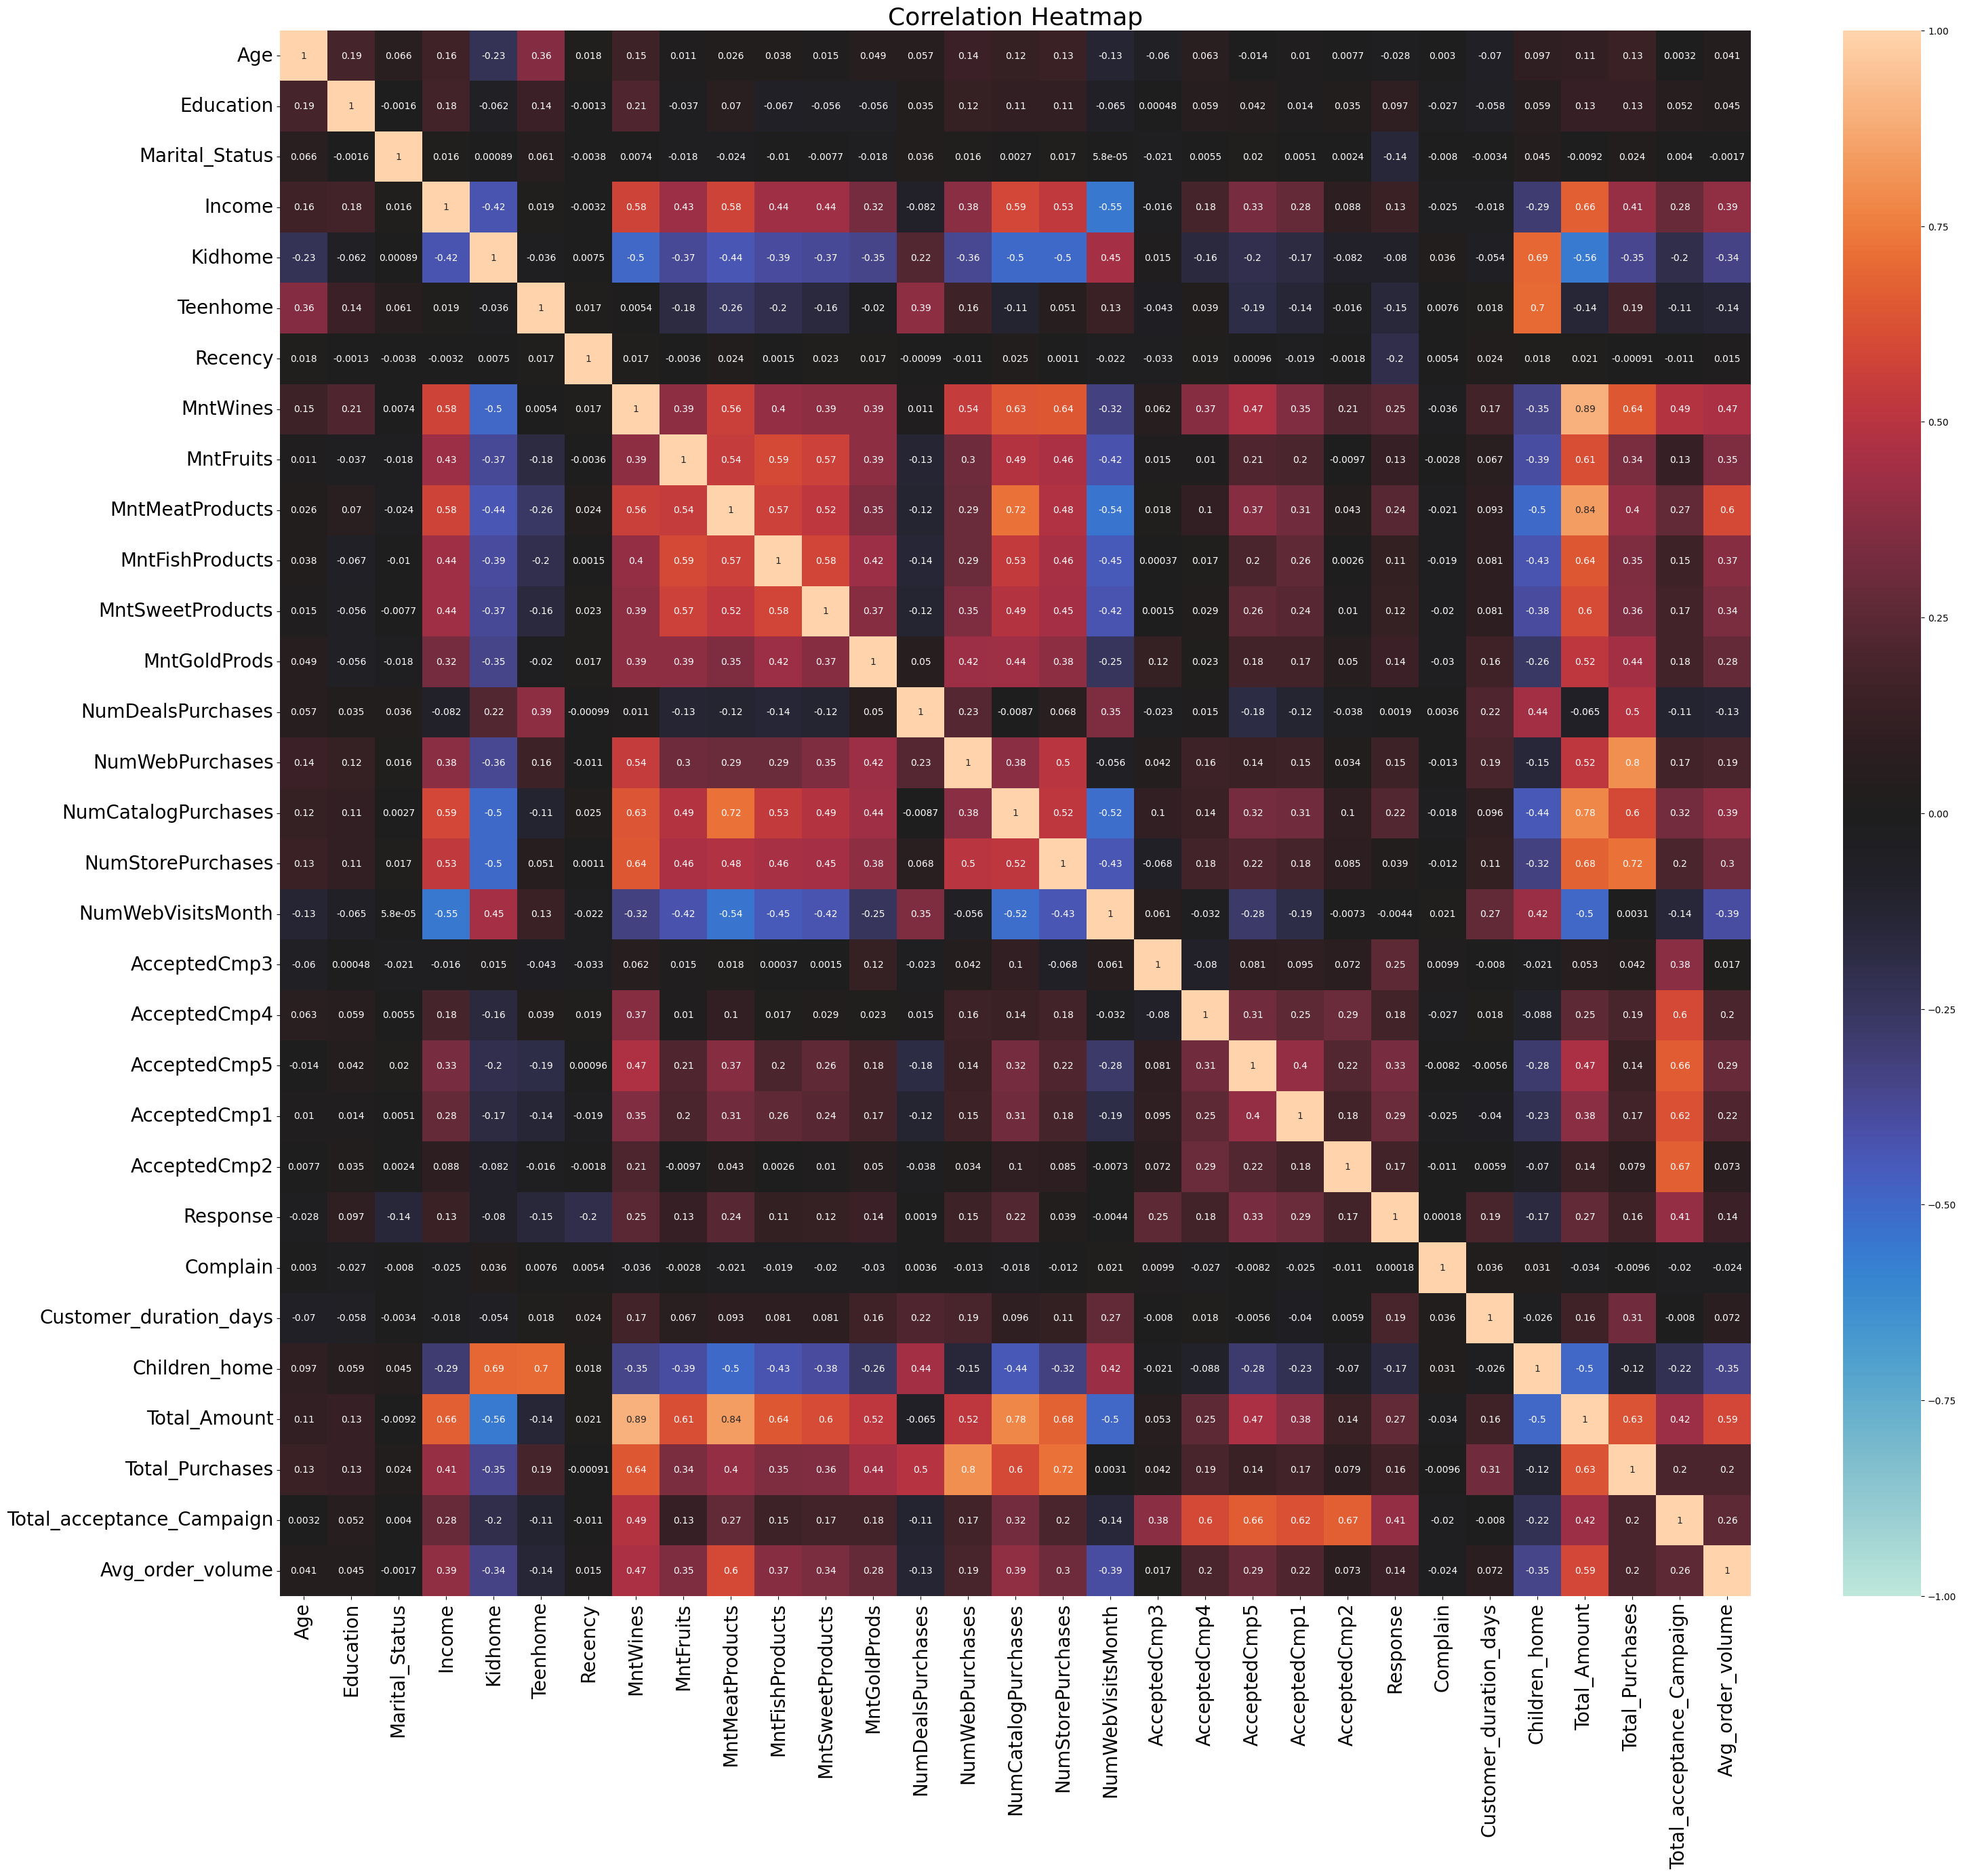

In [43]:
fig,ax = plt.subplots(figsize=(35, 30))

data=new_marketData.drop(columns=['ID'])

sn=sns.heatmap(data.corr(),vmin = -1, vmax = 1,center = 0, ax=ax, annot=True)

sn.set_yticklabels(sn.get_yticklabels(), rotation = 0, fontsize = 20)
sn.set_xticklabels(sn.get_xticklabels(), rotation = 90, fontsize = 20)

plt.title("Correlation Heatmap", fontdict= {'fontsize': 26})

plt.show()

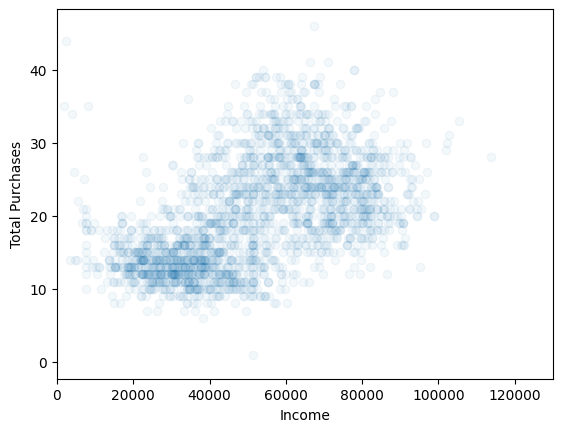

In [44]:
plt.scatter(new_marketData['Income'],new_marketData['Total_Purchases'],alpha=0.05)
plt.xlim(0, 130000)
plt.xlabel("Income")
plt.ylabel("Total Purchases")
chart_png(plt,"ScatterPlot_for_Income_and_Total_Purchases")
plt.show()

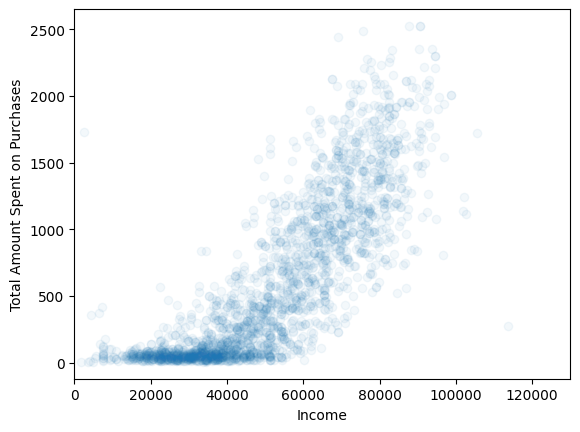

In [45]:
plt.scatter(new_marketData['Income'],new_marketData['Total_Amount'],alpha=0.05)
plt.xlabel("Income")
plt.ylabel("Total Amount Spent on Purchases")

plt.xlim(0, 130000)
chart_png(plt,"ScatterPlot_for_Income_and_Total_Amount_Spent")
plt.show()

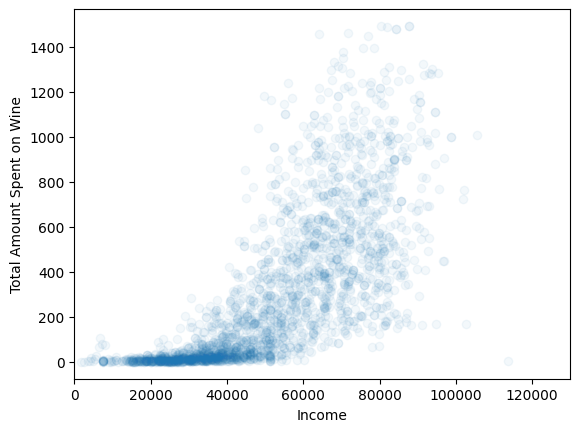

In [46]:
plt.scatter(new_marketData['Income'],new_marketData['MntWines'],alpha=0.05)
plt.xlabel("Income")
plt.ylabel("Total Amount Spent on Wine")
plt.xlim(0, 130000)
chart_png(plt,"ScatterPlot_for_Income_and_TotalAmount_spent_on_Wine")
plt.show()

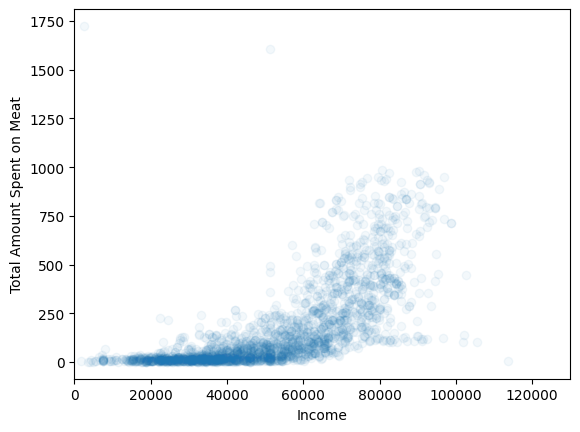

In [47]:
plt.scatter(new_marketData['Income'],new_marketData['MntMeatProducts'],alpha=0.05)
plt.xlabel("Income")
plt.ylabel("Total Amount Spent on Meat")

plt.xlim(0, 130000)
chart_png(plt,"ScatterPlot_for_Income_and_TotalAmount_spent_on_Wine")
plt.show()

#### From the heat map and the scatter plot high income has  positive correlation with Total purchases, Total amount spent.
#### That means, High Income individuals tend to spend more money and purchase more
#### From the heatmap we can also understand that the Income is not correlated with Number of Discounted Puchases (numDealPurchases), that means High income people tend to purchase fewer items with discount
#### From the scatter plot and heatmap we can observe that people with high income tend to buy wine & meat with higher price (quality) 
#### From the scatter plot we are also able to observe that people with less income tend to buy wine and meat in more quantity but of cheaper price (quality)

#### Comparing Family having Children with the num of total purchases

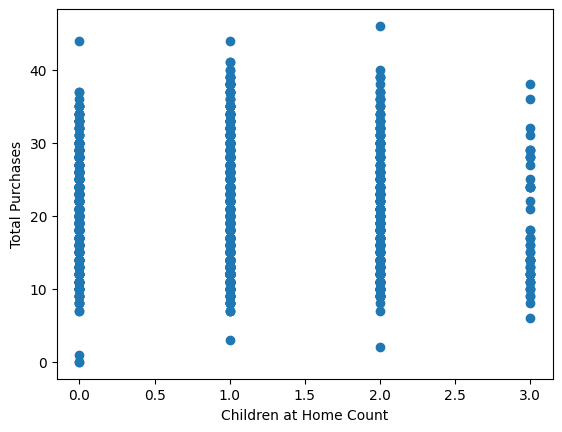

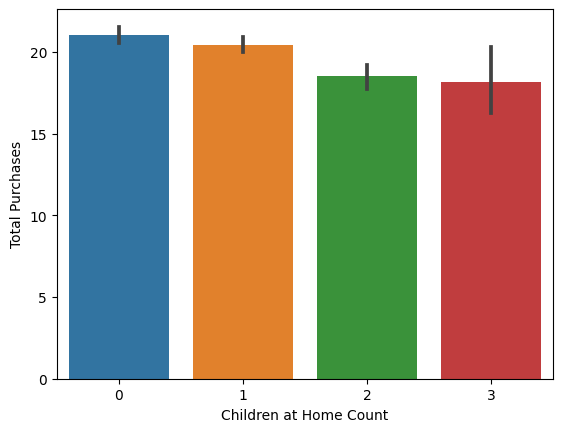

In [48]:
plt.scatter(new_marketData['Children_home'],new_marketData['Total_Purchases'])
plt.xlabel("Children at Home Count")
plt.ylabel("Total Purchases")
plt.show()

sns.barplot(x=new_marketData['Children_home'],y=new_marketData['Total_Purchases'])
plt.xlabel("Children at Home Count")
plt.ylabel("Total Purchases")

plt.show()

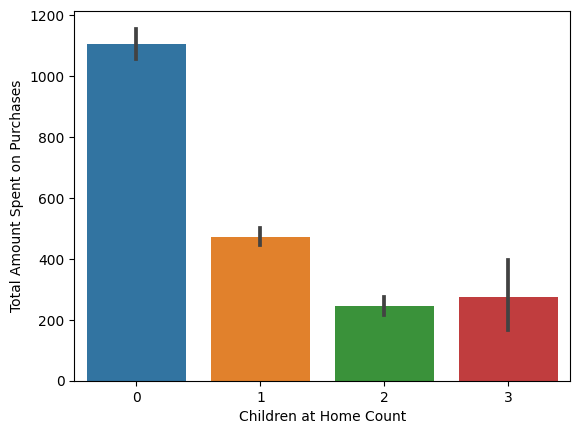

In [49]:
sns.barplot(x=new_marketData['Children_home'],y=new_marketData['Total_Amount'])
plt.xlabel("Children at Home Count")
plt.ylabel("Total Amount Spent on Purchases")
chart_png(plt,"BarPlot_for_Children_At_Home_and_Total_Amount_Spent")
plt.show()

#### There is no correlation between People having kids at home and Total number of purchases, however individuals with no children tend to spend more vs individuals with children. This might be due to more savings required for families with children.

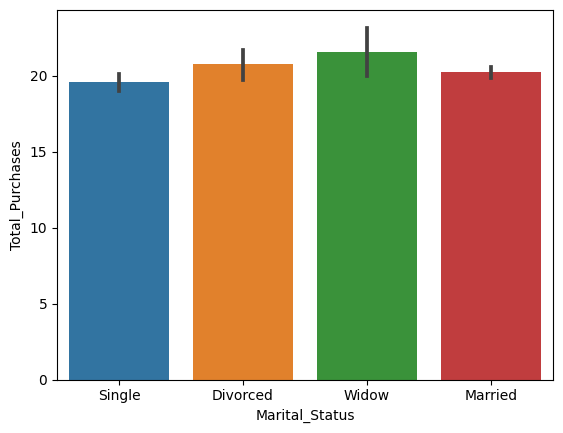

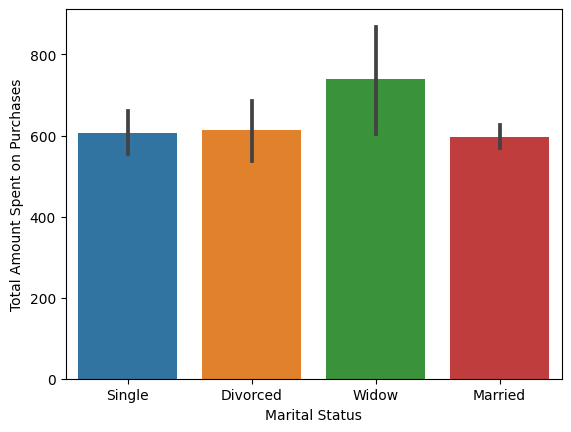

In [50]:
b = sns.barplot(x="Marital_Status", y="Total_Purchases", data=new_marketData)
b.set_xticklabels(["Single","Divorced","Widow","Married"])
plt.show()
a = sns.barplot(x="Marital_Status", y="Total_Amount", data=new_marketData)
plt.xlabel("Marital Status")
plt.ylabel("Total Amount Spent on Purchases")
a.set_xticklabels(["Single","Divorced","Widow","Married"])
chart_png(plt,"BarPlot_for_Children_At_Home_and_Total_Amount_Spent")
plt.show()

#### There is no correlation between marital status and Total number of purchases, however widows tend tend to spend more vs individuals with other marital statuses. This might be due to reduced other expenses

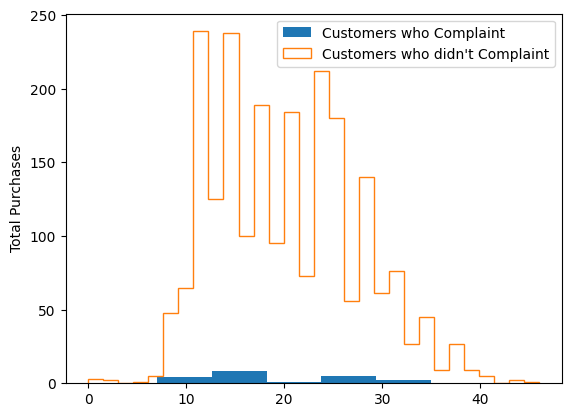

In [51]:
df_complain = new_marketData[new_marketData.Complain==1]
df_not_complain=new_marketData[new_marketData.Complain!=1]

plt.hist(df_complain.Total_Purchases,bins=5,label="Customers who Complaint")
plt.hist(df_not_complain.Total_Purchases,bins=30,histtype="step",label="Customers who didn't Complaint")

plt.ylabel("Total Purchases")
plt.legend()
chart_png(plt,"Complaint_customer_analyis_and_Total_purchases")
plt.show()

#### Here we can see drastic difference in customer purchases amongst people who have complained vs didn't complain, also helps us identify the importance of customer satisfaction for longer lasting business relations with our customers.

#### Marketing Campaingns analysis

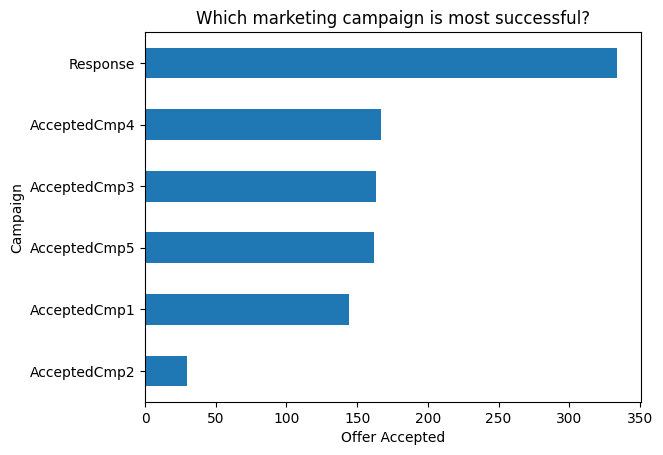

In [52]:
new_marketData[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
chart_png(plt,"Campaign Analysis")

### Here we can see that last marketing campaign is more successful

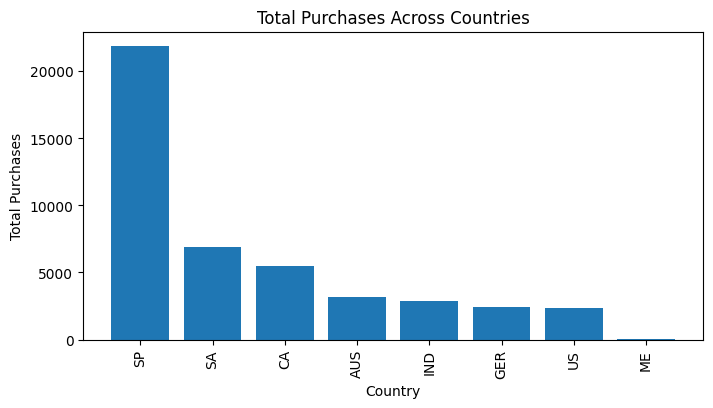

In [53]:
total_purchase =new_marketData['Total_Purchases'].groupby(new_marketData['Country']).sum()
total_purchase = total_purchase.sort_values(ascending=False)
plt.figure(figsize=(8, 4)) 
plt.bar(total_purchase.index, total_purchase)
plt.xticks(rotation=90)
plt.title('Total Purchases Across Countries')
plt.xlabel('Country')
plt.ylabel('Total Purchases')
chart_png(plt,"Total Purchases Across Countries")
plt.show()


### From this, we can clearly see that the US is second to last in terms of total purchases, only ahead of Mexico. 


Text(-91.77777777777779, 0.5, 'Channel')

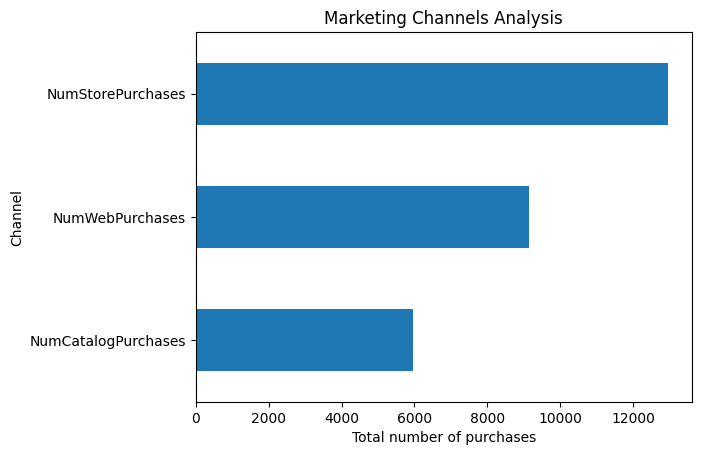

In [54]:
new_marketData[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Marketing Channels Analysis")
plt.xlabel("Total number of purchases")
chart_png(plt,"Marketing Channels Analysis")
plt.ylabel("Channel")

### From the above graph, we can understand that maximum purchases have been done through store visits and the next is through website.